<a href="https://colab.research.google.com/github/B-Alhousani/Car-Price-analysis/blob/main/Car_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Car_ID: the Id of the car in the dataset the first car takes number one and the second car takes the number 2 and so on.

2- Symboling: it means how much the auto is risky, the higher the symboling number goes the risker the automobile becomes. for example, 2 and 1 (2 is risker than one).

3-	CarName: the name of the manufacturer company.

4-	fueltype: means the car fuels category we have gas or diesel.

5-	aspiration: the engine if it is standard or turbo.

6-	doornumber: the number of doors the car has (2 or 4).

7-	carbody: the frame the car has. (Hatchback, sedan, etc….)

8-	drivewheel: how many wheels move when you use the car.

9-	enginelocation: the location of the engine.

10-	wheelbase: the distance between the front axles and the rear axles in the car.

11-	carlength: the length of the car.

12-	carwidth: the width of the car.  

13-	carheight : the height of the car.

14-	curbweight: the weight of the car when it is in a full tank and with it is equipment.

15-	enginetype: the type of engine the vehicle uses.

16-	cylindernumber: the number of cylinders goes higher the engine produce more power.

17-	enginesize: the size of the engine.

18-	 fuelsystem: the fuel cycle into and out of the engine called fuel system.

19-	Boreratio: is the ratio between the engine cylinder dimension bore diameter to the piston stroke.

20-	Stroke: the distance the piston traveled when it goes in each cycle.

21-	compressionratio: is the ratio between the highest cylinder volume and lowest cylinder volume it calculates whenever the piston is up and down of it is stroke.

22-	horsepower: the engine that the car has given power to the car this power is called horsepower

23-	peakrpm: calculate how many times the crankshaft does one rotation and it calculates every minute.

24-	citympg: the average of a mile per gallon the car gets when you drive in the city.

25-	highwaympg: the average of a mile per gallon the car gets when you drive in the highway.

26-	price: the car price.


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Reading the data
cp = pd.read_csv('CarPrices.csv')
cp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cp.shape

(205, 26)

Q10.Find the estimates of location and estimates of variability for two features in the dataset given above:

In [ ]:
#before we do location estimates and variability we need to see if data includes nulls in it
cp.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:xlabel='price'>

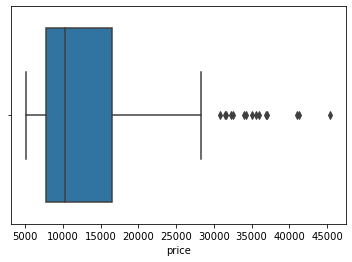

In [ ]:
#check if there is any outliers for car price and engincesize
sns.boxplot(x=cp['price'])

<AxesSubplot:xlabel='enginesize'>

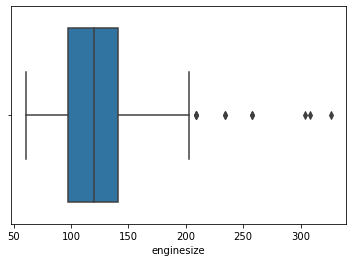

In [ ]:
sns.boxplot(x=cp['enginesize'])

In [ ]:
#even though there is outliers for car price and engine size but i kept them since the car price i want all the car price expensive and cheap and the engine size.
#Find the estimates of location and estimates of variability for two features in the dataset given above (i will d it in car price since it is the most important feature and in engineSize.)
cp['price'].mean()

13276.710570731706

In [ ]:
cp['enginesize'].mean()

126.90731707317073

In [ ]:
cp['price'].median()

10295.0

In [ ]:
cp['enginesize'].median()

120.0

In [ ]:
cp['price'].var()

63821761.57839796

In [ ]:
cp['enginesize'].var()

1734.1139167862254

In [ ]:
cp['price'].std()

7988.85233174315

In [ ]:
cp['enginesize'].std()

41.642693438179826

In [ ]:
#let's determine the feature if it Categorical or continuous by the unique values it contians
cp.CarName.unique()


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
#notice that there is a lot of car names even though it is a Categorical feature so i want to change the car names to co
CompanyName = cp['CarName'].apply(lambda x : x.split(' ')[0])
cp.insert(3,"CompanyName",CompanyName)
cp.drop(['CarName'],axis=1,inplace=True)


In [ ]:
#to check if the car name change to a car company
cp['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
#notice there is a miss type some of the car compnay maxda, porcshce, toyouta, vokswagen, vw
cp.CompanyName = cp.CompanyName.str.lower()

def replace_name(a,b):
    cp.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [ ]:
cp['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# car id is not Categorical since it is like a counter. let's find about other features
for feature in cp:

    print  (feature , cp[feature].unique())

car_ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling [ 3  1  2  0 -1 -2]
CompanyName ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'niss

In [ ]:
#after looking to the unique values the conclusion the catgorical data:
#CompanyName
# Symboling
# fueltype
# enginetype
# carbody
# doornumber
# enginelocation
# fuelsystem
# cylindernumber
# aspiration
# drivewheel

In [ ]:
# to determine the pin numbers in histogram we take the squre root for the count of data and round up the result
import math
math.sqrt(250)

15.811388300841896

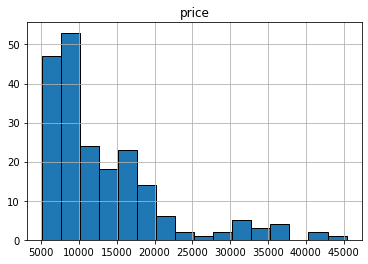

In [ ]:
cp.hist(column='price',edgecolor='black', bins=16)
plt.show()
#after the histogram for the price car  there is an outliers the minumum value is 5000 the maxumim value is 45400. the distribution is right skewed

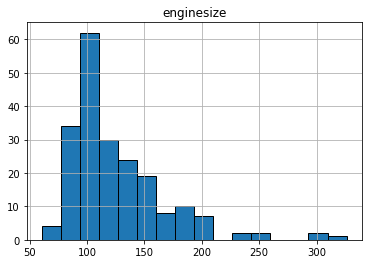

In [ ]:
cp.hist(column='enginesize',edgecolor='black', bins=16)
plt.show()
#after the visualzation the avarage for the data is 126 most of the data are between 97 and 120 the max value is 326 and the manumim value is 61. the distribution is right skewed

Q12:Plot a scatter plot to examine any relationships between two features and report if any trend exists. How can you quantify such trends or relationships?

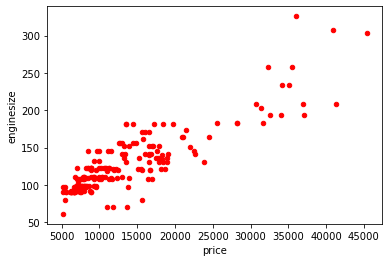

In [ ]:
cp.plot.scatter(x='price',y='enginesize',color= "red" )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

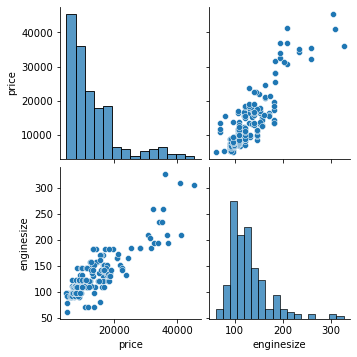

In [ ]:
df = cp[['price','enginesize']]
sns.pairplot(df,kind="scatter")
plt.show
#after the scatter plots we notice that there is  positive correlation

In [ ]:
#quentify this correlation
test = cp[['price','enginesize']]
test.corr(method='pearson')
#notice that it is strong correlation after the using cofficent correlation since the correlation is 0.9

,price,enginesize
price,1.000000,0.874145
enginesize,0.874145,1.000000


### single linear reagression & OLS model

In [ ]:
x1= df['enginesize']
y1= df['price']
x2 = sm.add_constant(x1)
model = sm.OLS(y1, x1 )
results = model.fit()
results.summary()
#the r squared is  0.912 so there is a strong relation between of them, and the p value is nearly zero which means the value is real and not in random way.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              2105.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                   1.88e-109
Time:                        10:02:00   Log-Likelihood:                         -2019.9
No. Observations:                 205   AIC:                                      4042.
Df Residuals:                     204   BIC:                                      4045.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
enginesize   110.7222      2.413     45.883      0.000     105.964     115.480
==============================================================================
Omnibus:                       61.009   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.683
Skew:                           1.493   Prob(JB):                     7.58e-26
Kurtosis:                       5.152   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### multiple linear regression

<AxesSubplot:>

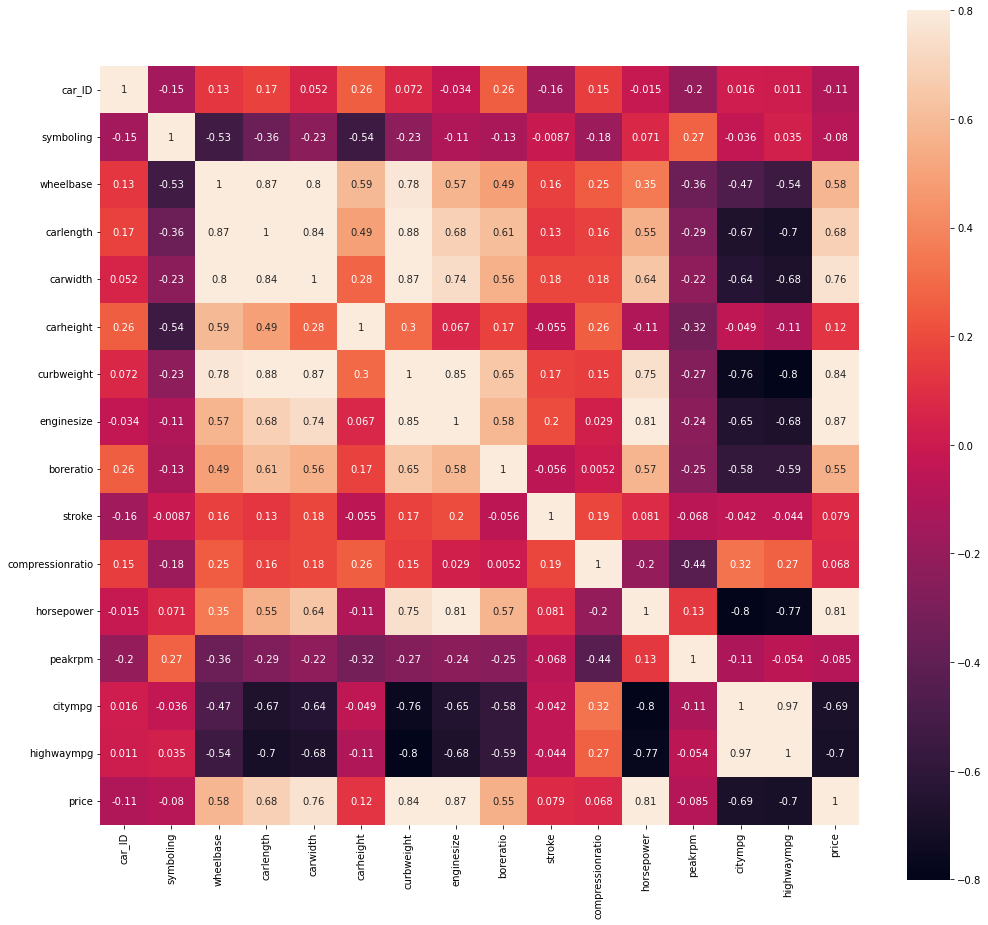

In [ ]:
#I did  a heatmap to see the correlation between features
corrcp = cp.corr()
f, ax = plt.subplots(figsize=(17, 16))
sns.heatmap(corrcp, vmax=.8, square=True,annot=True)

In [ ]:
#since the price is the most important feature in the data and the one i want to do a linear regression in, i did all the correlation with the price the highest correlation was (engine size,curbweight, horse power) and i want to do a multiple linear regression on them
cp.corr()['price'].abs()

car_ID              0.109093
symboling           0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm             0.085267
citympg             0.685751
highwaympg          0.697599
price               1.000000
Name: price, dtype: float64

In [ ]:
pre = cp.loc[:, ['enginesize','curbweight','horsepower']]
tar = cp['price']
X_train,X_test,Y_train,Y_test = train_test_split(pre,tar,test_size=0.2,random_state=40)

In [ ]:
ML = LinearRegression()

In [ ]:
ML.fit(X_train, Y_train)
Pred = ML.predict(X_test)

In [ ]:
print('Training :',ML.score(X_train,Y_train))

Training : 0.8107262213351527


In [ ]:
print('Testing:',ML.score(X_train,Y_train))

Testing: 0.8107262213351527


Is there any significant difference in car curbweight between two car bodies: sedan and wagon? Support your argument with the appropriate plot.

In [ ]:
#create two group based on car bodies
sedan = cp[(cp['carbody'] == 'sedan')]
wagon = cp[(cp['carbody']== 'wagon')]

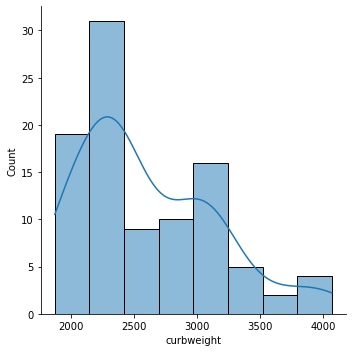

In [ ]:
#now we need to check the if it is Normal distribution or not so we do a histogram
sns.displot(data = sedan, x= "curbweight",kde=True)
plt.show()

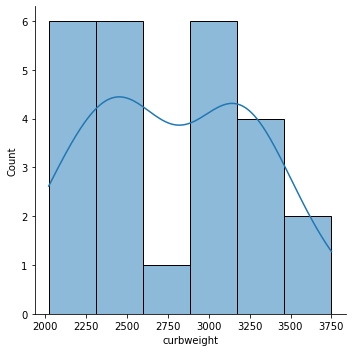

In [ ]:
sns.displot(data = wagon, x= "curbweight",kde=True)
plt.show()

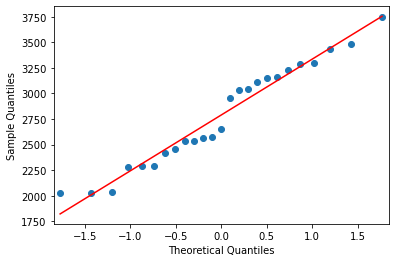

In [ ]:
#also checking if it is normal by QQ plot
sm.qqplot(wagon['curbweight'],line='q')
plt.show()

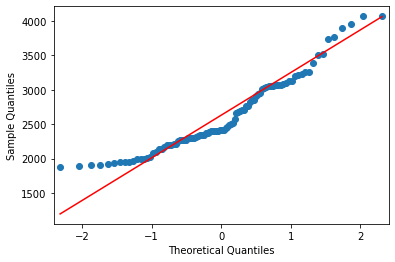

In [ ]:
sm.qqplot(sedan['curbweight'],line='q')
plt.show()

In [ ]:
#also checking if it is normall by shapiro_wilk if the p-value is bigger than 0.05 so the data is normally distrubeted
#notice that the wagon is not normally distrubeted since p-value is smaller than 0.05

print(stats.shapiro(wagon['curbweight']))
print(stats.shapiro(sedan['curbweight']))



ShapiroResult(statistic=0.9478416442871094, pvalue=0.22404570877552032)
ShapiroResult(statistic=0.9243727922439575, pvalue=3.462399399722926e-05)


so let's check the assumptions for t-test
1- Data values must be independent. Measurements for one observation do not affect measurements for any other observation (true)

2- Data in each group must be obtained via a random sample from the population. (true)

3- Data in each group are normally distributed. (false)

so we can't do a t-test let's see which test is the apporopriate test for our case:






so let's chose our test first it is two samples so it is between two independent and dependent sample.

since wagon and sedan independet group and we should use nonparametric test so the test is Mann-Whitney U test.


In [ ]:
#let's use the mann-Whitney U test, since the null hypothesis is the two value are equal the alternative will the two value are not equal so two-sided

test_value= stats.mannwhitneyu(sedan['curbweight'],wagon['curbweight'],alternative='two-sided')
print(test_value)

MannwhitneyuResult(statistic=907.0, pvalue=0.06112369316293515)


In [ ]:
from pingouin import mwu

mwu(sedan['curbweight'],wagon['curbweight'])

,U-val,alternative,p-val,RBC,CLES
MWU,907.0,two-sided,0.061124,0.244167,0.377917


In [ ]:
#get a p_value to add it in the box plot
pVal = test_value.pvalue
print(pVal)

0.06112369316293515


In [ ]:
options = ['wagon','sedan']
options
filtcp=cp[cp['carbody'].isin(options)]
filtcp.shape

(121, 26)

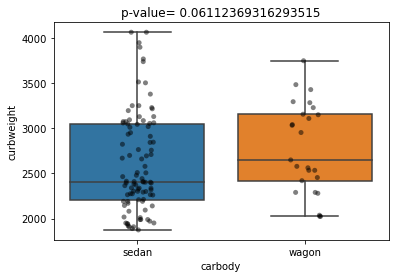

In [ ]:
pltTitle = 'p-value= ' +str(pVal)

boxplot= sns.boxplot(y='curbweight',x='carbody',data=filtcp)
boxPlot = sns.stripplot(x="carbody", y='curbweight', marker="o", alpha=0.5  , color="black", data=filtcp)
boxPlot.set_title(pltTitle)
plt.show()
#there is no differnce between sedan and wagon the difference is the size of the data

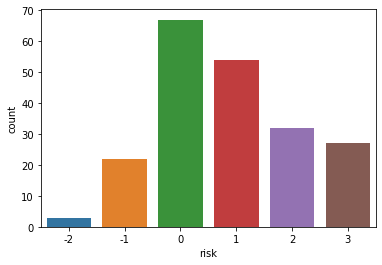

In [ ]:
sns.countplot (x='symboling',data=cp)
plt.xlabel('risk')
plt.show()
#most of the car are sold are score zero for the symboling then one so rearly they do a car with -1 or -2 Symboling which means we take the low risk into consederation but not very low

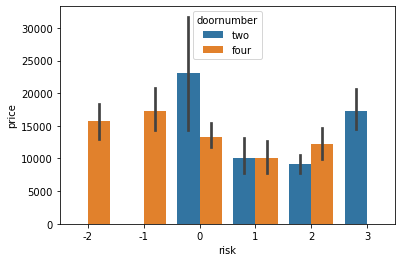

In [ ]:
sns.barplot (x='symboling',y='price',hue='doornumber',data=cp)
plt.xlabel('risk')
plt.show()
# the two doors cars are more risky than four doors, i don't see any relation ship between the door car and the price.

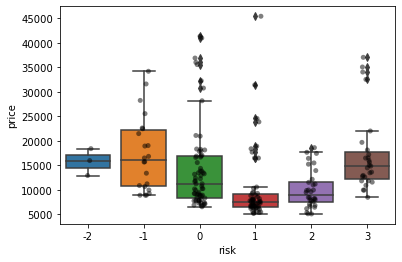

In [ ]:

sns.boxplot(x=cp.symboling, y=cp.price,data=cp)
sns.stripplot(x='symboling',y='price',data=cp,color='black',alpha=0.5)
plt.xlabel('risk')
plt.show()

#the cheapest when the symboling or risk is (1) and the expensive when it is (-1) and (-2)

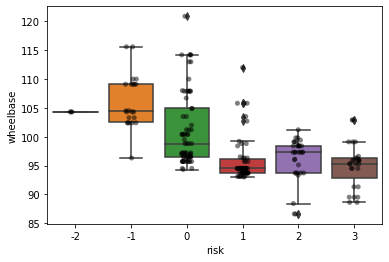

In [ ]:
sns.boxplot(x=cp.symboling, y=cp.wheelbase,data=cp)
sns.stripplot(x='symboling',y='wheelbase',data=cp,color='black',alpha=0.5)
plt.xlabel('risk')
plt.show()
#when the wheelbase decrease  the symboling increase which means the risk increase

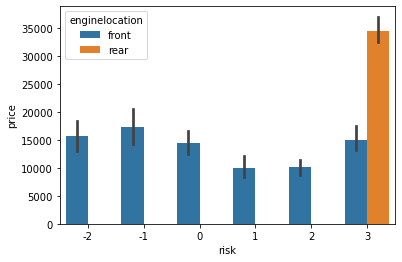

In [ ]:
sns.barplot (x='symboling',y='price',hue='enginelocation',data=cp)
plt.xlabel('risk')
plt.show()
#the rear is expensive and risker than the front

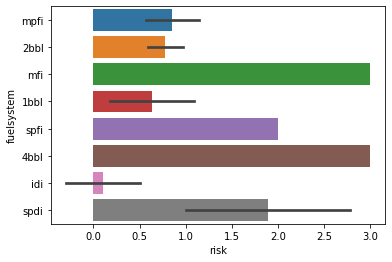

In [ ]:
sns.barplot(x='symboling',y='fuelsystem',data=cp)
plt.xlabel('risk')
plt.show()
#the bigeer symboling are 4bbl,mfi and the least symboling is idi

so after a useful visulazation for symboling we find that most sold cars are score (0) symboling,cars that have 2 door number have a higher symboling score than the four door, wagon carbody is the safest and convertible have the highest symboling score, engine location rear is most likely to have bigger symboling value and more expensive, when the wheelbase decrase the symboling increase,  the bigeer symboling are 4bbl,mfi and the least symboling is idi.

in the conclusion i recommend to build a car with 1 symboling since it is the most selling car so you need to take these features into consediration:
1- fuel system
2- wheelbase
3- enginelocation

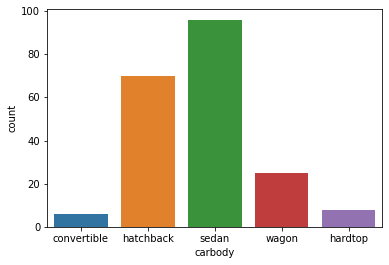

In [ ]:
sns.countplot (x='carbody',data=cp)
plt.show()
#the most sold carbody is sedan and the least are hardtop and convertible.

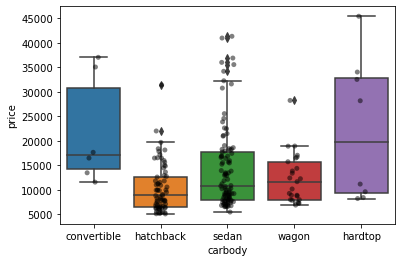

In [ ]:
sns.boxplot(x='carbody', y='price',data=cp)
sns.stripplot(x='carbody',y='price',data=cp,color='black',alpha=0.5)
plt.show()
#the hardtop and the convertible are the most expensive car body the chepeast one is hatchback and the one we are intersted in the sedan is in the middle with wagon

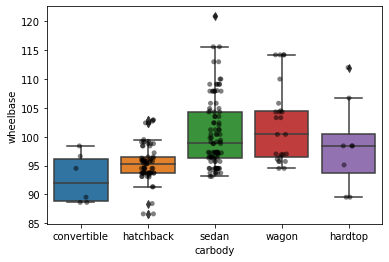

In [ ]:
sns.boxplot(x='carbody', y='wheelbase',data=cp)
sns.stripplot(x='carbody',y='wheelbase',data=cp,color='black',alpha=0.5)
plt.show()
#the convertible for the wheelbase is between 90-95, the wheelbase for the hathcback is nearly 95, and the seadn is between 97-105, the wagon is between the 97-104, the dardtop is between 92-100

C:\Users\uer\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


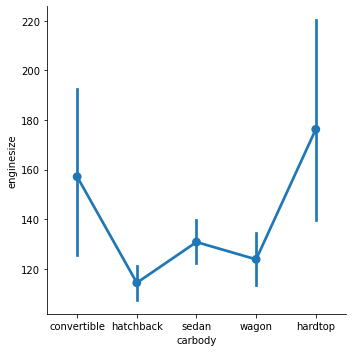

In [ ]:
sns.factorplot(x='carbody', y='enginesize', data=cp)
plt.show()
#the engine size for the convetible is nearly 160, the hatchback is nearly 120 enginesize, the sedan is nearly 110 enginesize, the wagon is nearly is nearly 123, the hardtop is nearly 180

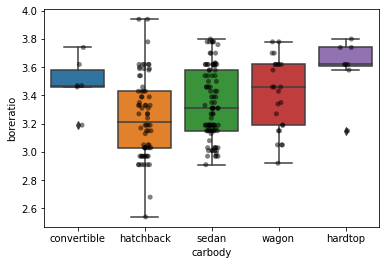

In [ ]:
sns.boxplot(x='carbody', y='boreratio',data=cp)
sns.stripplot(x='carbody',y='boreratio',data=cp,color='black',alpha=0.5)
plt.show()
#the boreratio for convertible is between 3.45-3.58 and the hathcback is between 3.1-3.4 and the sedan is between 3.15-3.57 and the wagon is between 3.18-3.6 and hardtop is between 3.61-3.47

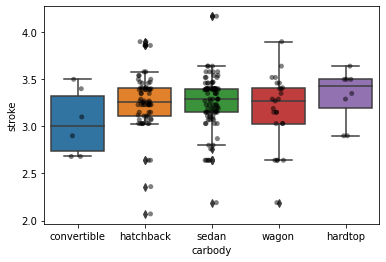

In [ ]:
sns.boxplot(x='carbody', y='stroke',data=cp)
sns.stripplot(x='carbody',y='stroke',data=cp,color='black',alpha=0.5)
plt.show()
#the stroke for convertible is between 2.7-3.3 and hatchnack is between 3.2-3.4 and sedan is between the 3.2-3.3 and wagon is between 3.0-3.3 and hardtop is between 3.2-3.5

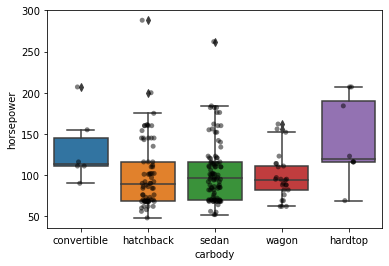

In [ ]:
sns.boxplot(x='carbody', y='horsepower',data=cp)
sns.stripplot(x='carbody',y='horsepower',data=cp,color='black',alpha=0.5)
plt.show()
#horse power for convertible is between 110-140 and the hatchback is between 55-110 and the sedan 55-110 and wagon is between 60-100 and hardtop is between 105-190

in the conclusion to determine the carbody that is sutiable for our company here is a specific information about each important features to determine the carbody to select which the company needs and want in this country but in my recommendation i reccomnd to select the sedan since it is the most sold car in the country but here is specific information that you might use:

1-price:the hardtop and the convertible are the most expensive car body the chepeast one is hatchback and the one we are intersted in the sedan is in the middle with wagon
2=wheelbase: (note that the wheelbase decrease the symboling increase)the convertible for the wheelbase is between 90-95, the wheelbase for the hathcback is nearly 95, and the seadn is between 97-105, the wagon is between the 97-104, the dardtop is between 92-100
3=enginesize: the engine size for the convetible is nearly 160, the hatchback is nearly 120 enginesize, the sedan is nearly 110 enginesize, the wagon is nearly is nearly 123, the hardtop is nearly 180
4=boreration: the boreratio for convertible is between 3.45-3.58 and the hathcback is between 3.1-3.4 and the sedan is between 3.15-3.57 and the wagon is between 3.18-3.6 and hardtop is between 3.61-3.47
5=stroke: the stroke for convertible is between 2.7-3.3 and hatchnack is between 3.2-3.4 and sedan is between the 3.2-3.3 and wagon is between 3.0-3.3 and hardtop is between 3.2-3.5
6-horsepower: horse power for convertible is between 110-140 and the hatchback is between 55-110 and the sedan 55-110 and wagon is between 60-100 and hardtop is between 105-190

so i think you need how this features affect the price to select the car the company want to made.

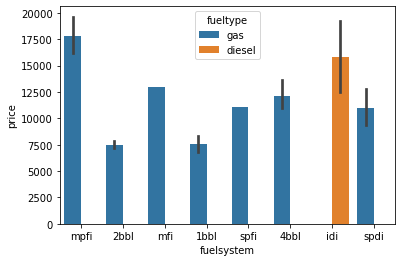

In [ ]:
sns.barplot (x='fuelsystem',y='price',hue='fueltype',data=cp)
plt.show()
#the most cars are sold is gas and the diesel have one type of fuel which is idi. the most expensive mpfi (gas), then idi (diesel), the cheapest 2bbl and 1bbl both of them are gas

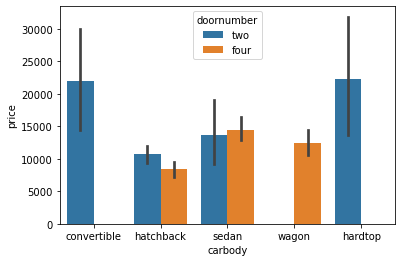

In [ ]:
sns.barplot (x='carbody',y='price',hue='doornumber',data=cp)
plt.show()
#the convertible and hardtop with two door are most expensive the cheapest is hatchback with 4 door

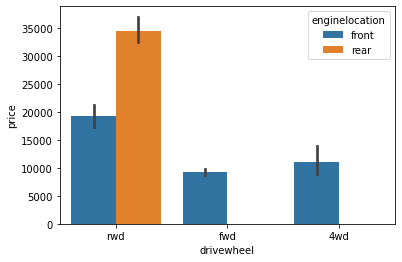

In [ ]:
sns.barplot (x='drivewheel',y='price',hue='enginelocation',data=cp)
plt.show()
#the most expensive is when the motor is rwd in driverwheel and the engine location is rear. only the rwd when the engine location is rear